### Purpose

The purpose of this notebook is not only to use a new package called `pyperclip` but also to understand the need to use functions. **Why do we create user-defned functions?**

In [1]:
# import necessary packages
import pyperclip
import pickle

Pyperclip allows us to copy text to our clipboard and paste on docs.

In [5]:
# copy items on clipboard
text = "Hello, I exist on python notebook."
pyperclip.copy(text)

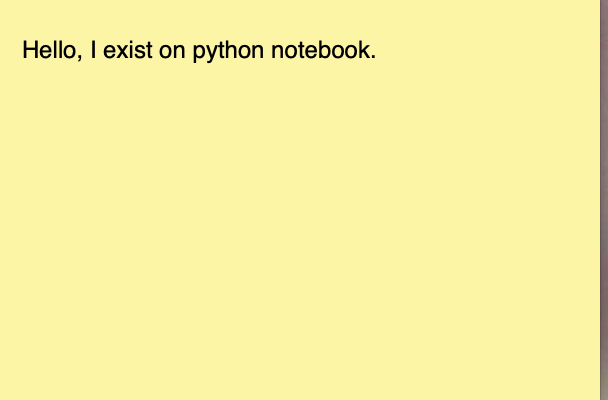

Now let's look at a text from outside.

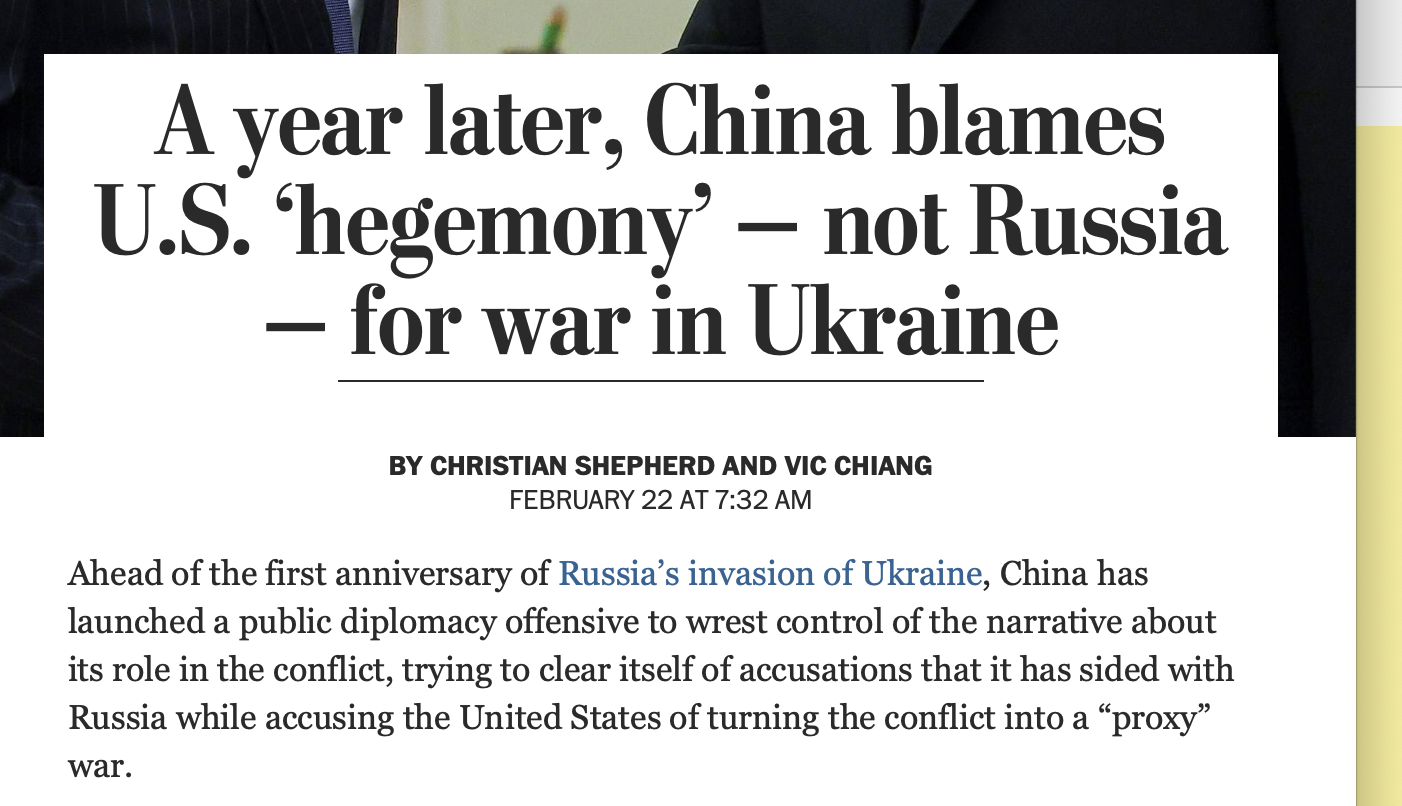

In [8]:
pyperclip.paste()

'A year later, China blames U.S. ‘hegemony’ — not Russia — for war in Ukraine\nAhead of the first anniversary of Russia’s invasion of Ukraine, China has launched a public diplomacy offensive to wrest control of the narrative about its role in the conflict, trying to clear itself of accusations that it has sided with Russia while accusing the United States of turning the conflict into a “proxy” war.'

In [9]:
d = {
    "a":1,
    "b":2,
    "c":3
}

`Pyperclip` can help us copy text, float, int and boolean types only. For structured complex type data such as dictionary, we have to pickle data.

In [13]:
import base64

In [14]:
# serializing dictionary
pickle.dumps(d)

b'\x80\x04\x95\x17\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x01a\x94K\x01\x8c\x01b\x94K\x02\x8c\x01c\x94K\x03u.'

In [16]:
# convert binary data to base 64 (ASCII representation)
base64.b64encode(pickle.dumps(d))

b'gASVFwAAAAAAAAB9lCiMAWGUSwGMAWKUSwKMAWOUSwN1Lg=='

In [17]:
# converting base 64 to string so that copied to clipboard
base64.b64encode(pickle.dumps(d)).decode()

'gASVFwAAAAAAAAB9lCiMAWGUSwGMAWKUSwKMAWOUSwN1Lg=='

In [33]:
pyperclip.copy(base64.b64encode(pickle.dumps(d)).decode())

Now, we will see how the data is converted back dictionary from the clipboard.

In [30]:
# get the data from clipboard
pyperclip.paste()

'gASVFwAAAAAAAAB9lCiMAWGUSwGMAWKUSwKMAWOUSwN1Lg=='

In [32]:
# encode data to base 64
context = pyperclip.paste()
context.encode()

b'gASVFwAAAAAAAAB9lCiMAWGUSwGMAWKUSwKMAWOUSwN1Lg=='

In [35]:
# convert to binary format 
base64.b64decode(context.encode())

b'\x80\x04\x95\x17\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x01a\x94K\x01\x8c\x01b\x94K\x02\x8c\x01c\x94K\x03u.'

In [36]:
# convert to dictionary
pickle.loads(base64.b64decode(context.encode()))

{'a': 1, 'b': 2, 'c': 3}

So, any sequence of steps to achieve a well defined goal can be structured into a function.

In [37]:
# function to copy complex data-type
def object_to_clipboard(obj):
    pyperclip.copy(base64.b64encode(pickle.dumps(obj)).decode())

In [38]:
# function to get back complex object from clipboard
def clipboard_to_object():
    context = pyperclip.paste()
    return pickle.loads(base64.b64decode(context.encode()))

Let's check the functions.

In [ ]:
class Person():
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def __repr__(self):
        return f"Person name: {self.name}, Person